## Covid Report
Importing packages

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import os 
import __future__
from scipy.integrate import odeint
import pandas as pd


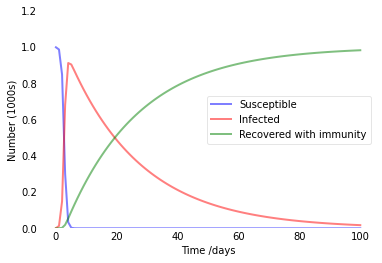

In [3]:
N = 1000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 2.6, 1/24 
# A grid of time points (in days)
t = np.linspace(0, 100, 100)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

Let's See Current Trends
Start with world trends

In [4]:
w_df = pd.read_csv('global/time_series_covid_19_confirmed.csv',index_col=0)
w_df.head()

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20
Province/State,,,,,,,,,,,,,,,,,,,,,
NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,...,840,906,933,996,1026,1092,1176,1279,1351,1463
NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,...,518,539,548,562,584,609,634,663,678,712
NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,...,2268,2418,2534,2629,2718,2811,2910,3007,3127,3256
NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,...,673,696,704,713,717,717,723,723,731,738
NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,...,19,19,24,24,24,24,25,25,25,25


In [5]:
w_df['Country/Region'].unique()


array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Diamond Princess', 'Cuba', 'Cyprus',
       'Czechia', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary',
       'Iceland', 'India

In [6]:
print(len(w_df['Country/Region'].unique()))

185


In [7]:
agg_deaths = list(w_df.iloc[:,3:].sum())
print(agg_deaths)

[555, 654, 941, 1434, 2118, 2927, 5578, 6166, 8234, 9927, 12038, 16787, 19881, 23892, 27635, 30794, 34391, 37120, 40150, 42762, 44802, 45221, 60368, 66885, 69030, 71224, 73258, 75136, 75639, 76197, 76819, 78572, 78958, 79561, 80406, 81388, 82746, 84112, 86011, 88369, 90306, 92840, 95120, 97886, 101801, 105847, 109821, 113590, 118620, 125875, 128352, 145205, 156101, 167454, 181574, 197102, 214821, 242570, 272208, 304507, 336953, 378231, 418041, 467653, 529591, 593291, 660693, 720140, 782389, 857487, 932475, 1013326, 1095698, 1175857, 1249484, 1321131, 1396092, 1479804, 1565278, 1657526, 1735650, 1834721, 1904838, 1975195, 2055057, 2151421, 2239144, 2316716, 2400078, 2471247, 2548091, 2623049, 2707728, 2809499, 2896744]


In [42]:
headers = w_df.columns.values.tolist() #optimal performance
dates = headers[3:]
print(dates)


['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20', '4/9/20', '4/10/20', '4/11/20', '4/12/20', '4/13/20', '4/14/20', '4/15/20', '4/16/20', '4/17/20', '4/18/20', '4/19/20', '4/20/20', '4/21/20', '4/22/20', '4/23/20', '4/

In [62]:
%matplotlib inline


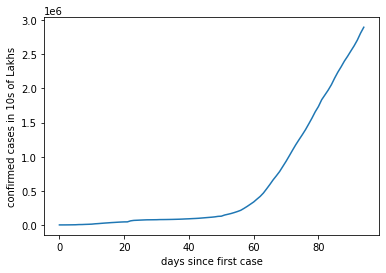

In [83]:
from datetime import time
#making the x axis readable
dates_list = [datetime.strptime(date, '%m/%d/%y').date() for date in dates]
delta_days = []
for i in range(len(dates_list)):
    x = dates_list[i]-dates_list[0]
    delta_days.append(x.days)
plt.xlabel('days since first case')
plt.ylabel('confirmed cases in 10s of Lakhs')


plt.plot(delta_days,agg_deaths, label='global')




Basic Projections?

In [73]:
avg_rise = pd.DataFrame(agg_deaths).diff()
print(avg_rise.sum()/len(avg_rise))
#average rise of 30,486 cases per day globally with a mix of alpha changes (restrictions of movement)

0    30486.2
dtype: float64


theoretically plotting the average rise ignoring the SIR model primarily due to ill configured variables